Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9118 - loss: 0.2855 - val_accuracy: 0.9879 - val_loss: 0.0408
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9871 - loss: 0.0431 - val_accuracy: 0.9884 - val_loss: 0.0335
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9914 - loss: 0.0276 - val_accuracy: 0.9866 - val_loss: 0.0413
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9938 - loss: 0.0189 - val_accuracy: 0.9919 - val_loss: 0.0234
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9952 - loss: 0.0143 - val_accuracy: 0.9914 - val_loss: 0.0310
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9898 - loss: 0.0370
Test accuracy: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted digit for uploaded image: 8


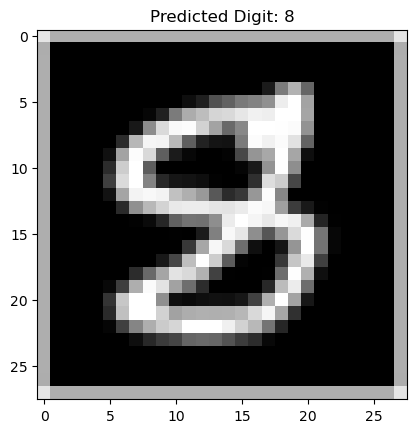

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load and preprocess the MNIST dataset
def preprocess_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Normalize pixel values to 0-1 range
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    # Reshape to include channel dimension
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    # One-hot encode labels
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

# Define the CNN model
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Preprocess uploaded image
def preprocess_uploaded_image(filepath):
    img = Image.open(filepath).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img = np.array(img) / 255.0  # Normalize pixel values
    img = img.reshape(1, 28, 28, 1)  # Reshape to match input shape
    return img

# Main training and evaluation workflow
def main():
    (x_train, y_train), (x_test, y_test) = preprocess_data()

    # Build and train the model
    model = build_model()
    model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {test_acc:.2f}")

    # Load and predict on the uploaded image
    uploaded_img = preprocess_uploaded_image('8.png')
    prediction = model.predict(uploaded_img)
    predicted_digit = np.argmax(prediction)
    print(f"Predicted digit for uploaded image: {predicted_digit}")
    
    # Visualize the uploaded image
    plt.imshow(uploaded_img[0, :, :, 0], cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.show()

if __name__ == "__main__":
    main()
